<a href="https://colab.research.google.com/github/zz186/ANLY-590/blob/master/ANLY590_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLY590-HW2
# Ze Zheng

## 1 Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, SimpleRNN, LSTM, Embedding,Bidirectional,Activation, Flatten,GlobalMaxPooling1D 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Conv1D, MaxPooling1D
from keras.models import Model,Sequential
from keras import backend as K
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
import cv2
from keras.applications import VGG16

from keras.preprocessing import sequence
import requests
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

In [4]:
#load the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = Dropout(0.3)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.3)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
#train
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.3653 - val_loss: 0.3299
Epoch 2/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.3244 - val_loss: 0.3090
Epoch 3/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.3159 - val_loss: 0.3135
Epoch 4/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.3110 - val_loss: 0.3009
Epoch 5/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.3075 - val_loss: 0.3038
Epoch 6/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.3049 - val_loss: 0.2967
Epoch 7/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.3026 - val_loss: 0.2944
Epoch 8/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.3010 - val_loss: 0.2929
Epoch 9/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.2995 - val_loss: 0.2

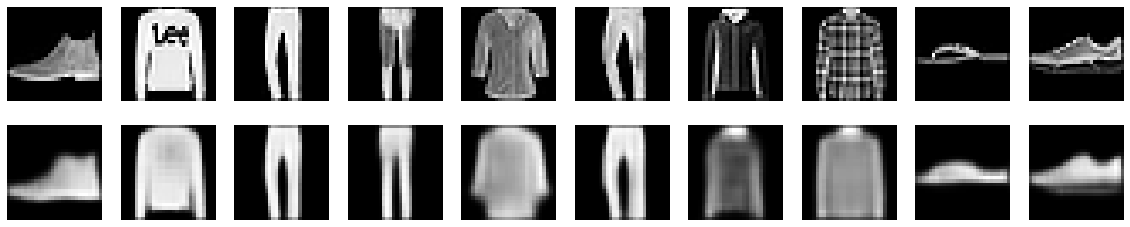

In [8]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2 Image Classification

### 2.1 Deep CNN

In [0]:
# loading the data 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [18]:
# Set up the neural network
model = Sequential()

# First Conv layer
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                strides=(1,1),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))
# First Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv layer
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                 strides=(1,1),
                padding='same',
                activation='relu'))

# Second Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer with 0.25 probability
model.add(Dropout(0.25))

# Third Conv layer
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                strides=(1,1),
                padding='same',
                activation='relu'))

# Third Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Following layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 64)          0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, 
          batch_size = 128,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.7338 - acc: 0.7352 - val_loss: 0.4219 - val_acc: 0.8461
Epoch 2/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.4414 - acc: 0.8420 - val_loss: 0.3489 - val_acc: 0.8695
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3768 - acc: 0.8639 - val_loss: 0.3210 - val_acc: 0.8792
Epoch 4/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.3427 - acc: 0.8763 - val_loss: 0.2865 - val_acc: 0.8920
Epoch 5/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.3201 - acc: 0.8846 - val_loss: 0.2906 - val_acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.2990 - acc: 0.8905 - val_loss: 0.2625 - val_acc: 0.9034
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2871 - acc: 0.8960 - val_loss: 0.2625 -

In [20]:
# Evaluate the model on test set and training set

test_score = model.evaluate(X_test, Y_test)
train_score = model.evaluate(X_train, Y_train)
print('The accuracy of the trained model on the test set is:',test_score[1],'The loss is:',test_score[0])
print('The accuracy of the trained model on the training set is:',train_score[1],'The loss is:',train_score[0])

60000/60000 [==============================] - 6s 102us/step
The accuracy of the trained model on the test set is: 0.9113 The loss is: 0.24246345711946488
The accuracy of the trained model on the training set is: 0.9282666666666667 The loss is: 0.19070605781128008


The neural network I have made contains three convolution layers, the first layer is 32 filters, 3 by 3 kernel sizes, 1 by 1 strides, 'same' padding. The rest of two layers are 64 filters, 3 by 3 kernel sizes, 1 by 1 strides, 'same' padding. And a max pooling layer followed with each convolution layers. After each max pooling layer, a drop out was applied.  

The model's perfomance on training set and test set is showing above. 

### 2.2 Transfer Learning

In [23]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

ishape = 32

X_train = [cv2.cvtColor(cv2.resize(i,(ishape,ishape)), cv2.COLOR_GRAY2BGR) for i in X_train]
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')
 
X_test  = [cv2.cvtColor(cv2.resize(i,(ishape,ishape)), cv2.COLOR_GRAY2BGR) for i in X_test ]
X_test  = np.concatenate([arr[np.newaxis] for arr in X_test] ).astype('float32')

X_train.shape
X_test.shape
 
X_train /= 255
X_test /= 255
  
def train_y(y):
    y_one = np.zeros(10)
    y_one[y] = 1
    return y_one
    
y_train = np.array([train_y(y_train[i]) for i in range(len(y_train))])
y_test  = np.array([train_y(y_test [i]) for i in range(len(y_test ))])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)
(60000, 10)
(10000, 10)


In [25]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="sigmoid"))

conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(1e-4),metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, 
          batch_size = 128,
          validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 399us/step - loss: 1.3959 - acc: 0.6414 - val_loss: 0.8334 - val_acc: 0.7471
Epoch 2/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.6966 - acc: 0.7747 - val_loss: 0.6369 - val_acc: 0.7852
Epoch 3/5
60000/60000 [==============================] - 22s 365us/step - loss: 0.5867 - acc: 0.7998 - val_loss: 0.5704 - val_acc: 0.8054
Epoch 4/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.5385 - acc: 0.8129 - val_loss: 0.5348 - val_acc: 0.8159
Epoch 5/5
60000/60000 [==============================] - 22s 365us/step - loss: 0.5089 - acc: 0.8228 - val_loss: 0.5114 - val_acc: 0.8221


In [27]:
# Evaluate the model on test set and training set

test_score = model.evaluate(X_test, y_test)
train_score = model.evaluate(X_train, y_train)
print('The accuracy of the trained model on the test set is:',test_score[1],'The loss is:',test_score[0])
print('The accuracy of the trained model on the training set is:',train_score[1],'The loss is:',train_score[0])

60000/60000 [==============================] - 33s 551us/step
The accuracy of the trained model on the test set is: 0.8221 The loss is: 0.5114332280158996
The accuracy of the trained model on the training set is: 0.8267166666666667 The loss is: 0.4954382038195928


The performance of the VGG model on training set and test is showing above, obviously the performance is worse than the deep CNN model. 

## 3 Text Classification

### 3.1 RNN

In [0]:
#load the data
benign = requests.get('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt').text.split('\n')
malicious = requests.get('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt').text.split('\n')
X = benign+malicious
Y = [1 for _ in range(len(benign))]+[0 for _ in range(len(malicious))]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
#Process the data
max_words = 70
max_len = 150
tok = Tokenizer(lower = False, char_level = True, filters=None)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [34]:
#define the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 64))
rnn_model.add(Bidirectional(LSTM(64,activation="tanh")))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()
rnn_model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          4480      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 70,657
Trainable params: 70,657
Non-trainable params: 0
_________________________________________________________________


In [35]:
rnn_model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5)

Epoch 1/5
53883/53883 [==============================] - 294s 5ms/step - loss: 0.0620 - acc: 0.9804
Epoch 2/5
53883/53883 [==============================] - 292s 5ms/step - loss: 0.0291 - acc: 0.9861
Epoch 3/5
53883/53883 [==============================] - 292s 5ms/step - loss: 0.0270 - acc: 0.9876
Epoch 4/5
53883/53883 [==============================] - 292s 5ms/step - loss: 0.0250 - acc: 0.9888
Epoch 5/5
53883/53883 [==============================] - 292s 5ms/step - loss: 0.0254 - acc: 0.9885


In [37]:
test_score = rnn_model.evaluate(test_sequences_matrix,Y_test)
print('The accuracy of the trained model on the test set is:',test_score[1],'The loss is:',test_score[0])

13471/13471 [==============================] - 73s 5ms/step
The accuracy of the trained model on the test set is: 0.9881968673446663 The loss is: 0.024096711008943388


For the Recurrent Neural Network model trained above, I choose the LSTM, it performs really good on the test set which yield a pretty high accuracy score 0.98819, and a low loss 0.02409. 

### 3.2 CNN

In [76]:
#For CNN text Classification
Y_train_cnn = to_categorical(Y_train, num_classes = 2)
Y_test_cnn = to_categorical(Y_test, num_classes = 2)

  
cnn_model = Sequential()
cnn_model.add(Embedding(max_words,
                    64))
cnn_model.add(Conv1D(64,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64))
cnn_model.add(Dropout(0.2))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(2))
cnn_model.add(Activation('softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          4480      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          12352     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
__________

In [77]:
cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

cnn_model.fit(sequences_matrix, Y_train_cnn, batch_size=128, epochs=5)

Epoch 1/5
53883/53883 [==============================] - 6s 119us/step - loss: 0.0889 - acc: 0.9790
Epoch 2/5
53883/53883 [==============================] - 5s 88us/step - loss: 0.0293 - acc: 0.9872
Epoch 3/5
53883/53883 [==============================] - 5s 87us/step - loss: 0.0220 - acc: 0.9906
Epoch 4/5
53883/53883 [==============================] - 5s 87us/step - loss: 0.0185 - acc: 0.9920
Epoch 5/5
53883/53883 [==============================] - 5s 87us/step - loss: 0.0160 - acc: 0.9931


In [79]:
test_score = cnn_model.evaluate(test_sequences_matrix,Y_test_cnn)
print('The accuracy of the trained model on the test set is:',test_score[1],'The loss is:',test_score[0])

13471/13471 [==============================] - 2s 120us/step
The accuracy of the trained model on the test set is: 0.9906465741221884 The loss is: 0.020431507240649568


For the Convolutional Neural Network model with 1D, it performs really good on the test set which yield a pretty high accuracy score 0.99, and a low loss 0.0204. 

### 3.3

In [0]:
#predition for cnn model
y_test_preds_cnn       = cnn_model.predict(test_sequences_matrix, batch_size=64)
y_test_preds_cnn_T = y_test_preds_cnn.transpose()
y_test_preds_cnn_2 = y_test_preds_cnn_T[1]
y_test_preds_cnn_2 = np.array([y_test_preds_cnn_2]).T
y_test_preds_cnn_2

# predition for RNN model
y_test_preds_rnn       = rnn_model.predict(test_sequences_matrix, batch_size=64)


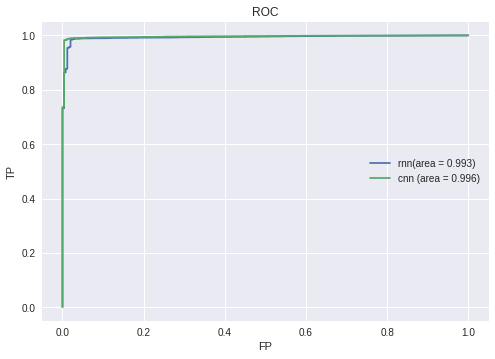

In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_r, true_positive_r, thresholds_r = roc_curve(Y_test, y_test_preds_rnn)
false_positive_c, true_positive_c, thresholds_c = roc_curve(Y_test, y_test_preds_cnn_2)
plt.plot(false_positive_r, true_positive_r, label='rnn(area = {:.3f})'.format(auc(false_positive_r, true_positive_r)))
plt.plot(false_positive_c, true_positive_c, label='cnn (area = {:.3f})'.format(auc(false_positive_c, true_positive_c)))
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC')
plt.legend(loc='right')
plt.show()

According to the ROC curve plot for the CNN and RNN models above, both of them are perform perfect, one area is 0.993, another is 0.996. The CNN model has a little bit better than RNN model. Also, the training time of CNN is faster than RNN a lot which is almost 100 times. 